<a href="https://colab.research.google.com/github/khushboo0824/Binary-image-classification/blob/main/muffinchihuahua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from os import listdir, makedirs
from os.path import isfile, join
import numpy as np
import pandas as pd
import glob
import cv2
import zipfile
import pickle
import seaborn as sns
from pathlib import Path
import shutil
import statistics as st
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
import random
from tqdm.auto import tqdm
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/My Drive/archive"

In [ ]:
!unzip -q /content/drive/MyDrive/archive.zip

In [ ]:
train_muffin_path = '/content/train/muffin'
train_chihuahua_path = '/content/train/chihuahua'

print("Muffins photos in train folder: " + str(len(os.listdir(train_muffin_path))))
print("Chihuahua photos in train folder: " + str(len(os.listdir(train_chihuahua_path))))

test_muffin_path = '/content/test/muffin'
test_chihuahua_path = '/content/test/chihuahua'

print("Muffins photos in test folder: " + str(len(os.listdir(test_muffin_path))))
print("Chihuahua photos in test folder: " + str(len(os.listdir(test_chihuahua_path))))

Muffins photos in train folder: 2174
Chihuahua photos in train folder: 2559
Muffins photos in test folder: 544
Chihuahua photos in test folder: 640


In [ ]:
print("Total photos of Muffins - :",2174+544)
print("Total photos of Chihuahua - :",2559+640)

Total photos of Muffins - : 2718
Total photos of Chihuahua - : 3199


In [ ]:
# Defining directories
training_directory = '/content/train'
test_directory = '/content/test'
validation_directory = '/content/validation'


os.makedirs(validation_directory, exist_ok=True)

classes = ['muffin', 'chihuahua']


validation_ratio = 0.2


for class_name in classes:

    os.makedirs(os.path.join(validation_directory, class_name), exist_ok=True)

    filenames = os.listdir(os.path.join(training_directory, class_name))


    num_validation_files = int(len(filenames) * validation_ratio)

    random.shuffle(filenames)


    validation_files = filenames[:num_validation_files]


    for filename in validation_files:
        src = os.path.join(training_directory, class_name, filename)
        dst = os.path.join(validation_directory, class_name, filename)
        os.rename(src, dst)

In [ ]:

directories = {
    'train': '/content/train',
    'validation': '/content/validation',
    'test': '/content/test'
}


def count_images(directory):
    return sum(len(files) for _, _, files in os.walk(directory))


counts = {name: count_images(path) for name, path in directories.items()}

# Print the number of images in each set
for name, count in counts.items():
    print(f"Number of images in {name} set: {count}")

Number of images in train set: 3788
Number of images in validation set: 945
Number of images in test set: 1184


Preprocessing

Found 3788 images belonging to 2 classes.
Found 945 images belonging to 2 classes.


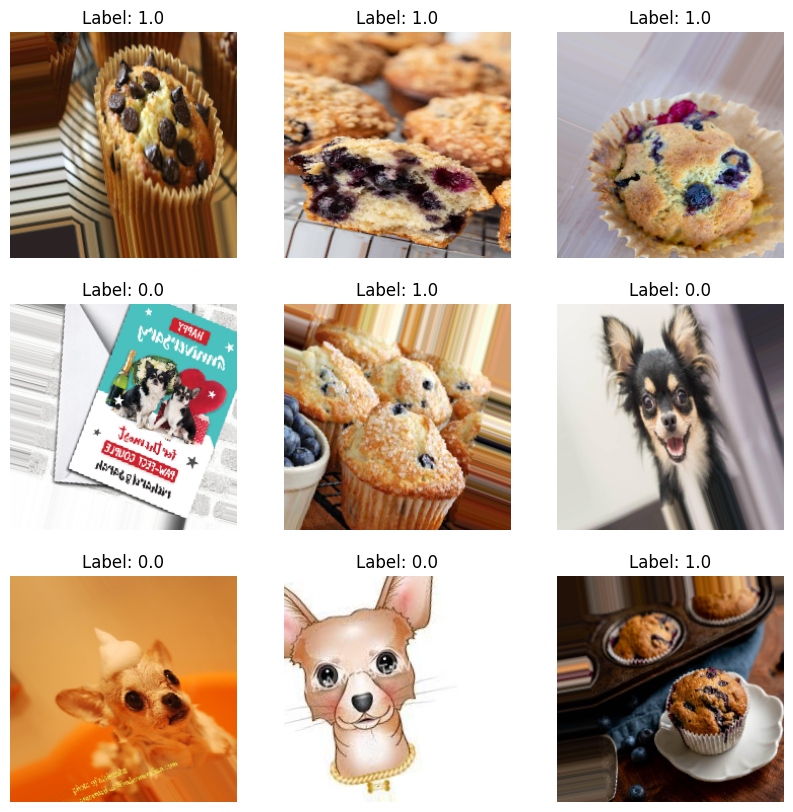

In [ ]:
target_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,  a
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    channel_shift_range=0.2
)
train_generator = datagen.flow_from_directory(
    '/content/train',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    classes=['chihuahua', 'muffin']
)


val_generator = datagen.flow_from_directory(
    '/content/validation',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    classes=['chihuahua', 'muffin']
)

# Print some sample images
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title('Label: {}'.format(sample_labels[i]))
    plt.axis('off')
plt.show()

In [ ]:
test_generator = datagen.flow_from_directory(
    '/content/test',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    classes=['chihuahua', 'muffin']
)

Found 1184 images belonging to 2 classes.


In [ ]:
stop_early = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)]

FULLY CONNECTED NEURAL NETWORK

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(target_size[0], target_size[1], 3)),  # Flatten the input image
    tf.keras.layers.Dense(64, activation='relu'),  # Fully connected layer with 256 units and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])


model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model1.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=stop_early)


Epoch 1/50
119/119 [==============================] - 53s 438ms/step - loss: 7.2616 - accuracy: 0.5950 - val_loss: 5.6272 - val_accuracy: 0.5873
Epoch 2/50
119/119 [==============================] - 51s 432ms/step - loss: 8.3037 - accuracy: 0.6143 - val_loss: 5.6719 - val_accuracy: 0.6138
Epoch 3/50
119/119 [==============================] - 50s 420ms/step - loss: 4.0172 - accuracy: 0.6502 - val_loss: 8.5829 - val_accuracy: 0.5037
Epoch 4/50
119/119 [==============================] - 50s 424ms/step - loss: 4.8093 - accuracy: 0.6418 - val_loss: 2.7811 - val_accuracy: 0.6804
Epoch 5/50
119/119 [==============================] - 49s 412ms/step - loss: 2.8619 - accuracy: 0.6861 - val_loss: 2.2970 - val_accuracy: 0.7185
Epoch 6/50
119/119 [==============================] - 51s 427ms/step - loss: 1.8793 - accuracy: 0.7210 - val_loss: 1.6119 - val_accuracy: 0.7143
Epoch 7/50
119/119 [==============================] - 51s 424ms/step - loss: 1.3795 - accuracy: 0.7468 - val_loss: 2.0162 - val_ac

In [ ]:
metrics_df1= pd.DataFrame(history.history)

In [ ]:
metrics_df1

,loss,accuracy,val_loss,val_accuracy
0,7.261607,0.595037,5.627152,0.587302
1,8.303659,0.614308,5.671880,0.613757
2,4.017238,0.650211,8.582902,0.503704
3,4.809250,0.641763,2.781064,0.680423
4,2.861895,0.686114,2.297020,0.718518
5,1.879304,0.720961,1.611907,0.714286
6,1.379498,0.746832,2.016161,0.598942
7,1.148758,0.752112,1.400138,0.694180
8,1.484571,0.728353,1.250779,0.736508
9,0.918488,0.775343,1.302315,0.684656


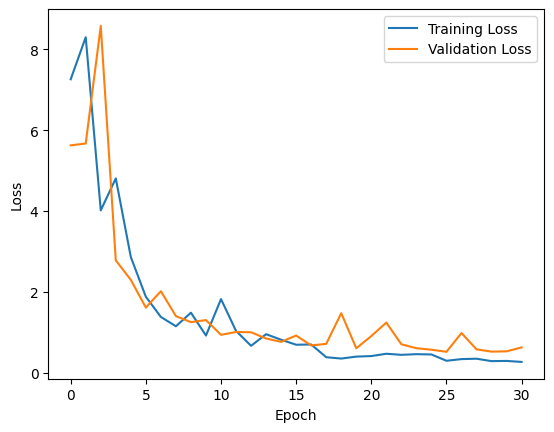

In [ ]:
# Plot training and validation loss
plt.plot(metrics_df1['loss'], label='Training Loss')
plt.plot(metrics_df1['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

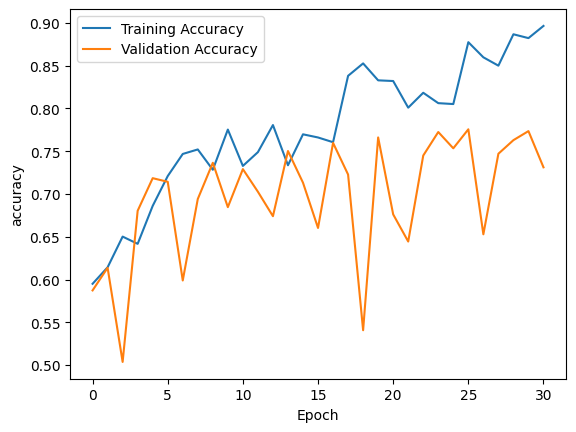

In [ ]:
# Plot training and validation loss
plt.plot(metrics_df1['accuracy'], label='Training Accuracy')
plt.plot(metrics_df1['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

fully connected neural network with dropout

In [ ]:
model12 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(target_size[0], target_size[1], 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model12.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model12.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 128)               19267712  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19276033 (73.53 MB)
Trainable params: 19

In [ ]:
history12 = model12.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=stop_early)

Epoch 1/50
119/119 [==============================] - 84s 697ms/step - loss: 7.4304 - accuracy: 0.5343 - val_loss: 0.6914 - val_accuracy: 0.5407
Epoch 2/50
119/119 [==============================] - 76s 636ms/step - loss: 0.6910 - accuracy: 0.5407 - val_loss: 0.6904 - val_accuracy: 0.5407
Epoch 3/50
119/119 [==============================] - 78s 654ms/step - loss: 0.6934 - accuracy: 0.5414 - val_loss: 0.6900 - val_accuracy: 0.5407
Epoch 4/50
119/119 [==============================] - 79s 666ms/step - loss: 0.6899 - accuracy: 0.5407 - val_loss: 0.6899 - val_accuracy: 0.5407
Epoch 5/50
119/119 [==============================] - 79s 660ms/step - loss: 0.6901 - accuracy: 0.5407 - val_loss: 0.6898 - val_accuracy: 0.5407
Epoch 6/50
119/119 [==============================] - 78s 655ms/step - loss: 0.6900 - accuracy: 0.5407 - val_loss: 0.6898 - val_accuracy: 0.5407
Epoch 7/50
119/119 [==============================] - 81s 680ms/step - loss: 0.6901 - accuracy: 0.5407 - val_loss: 0.6898 - val_ac

In [ ]:
metrics_df12= pd.DataFrame(history12.history)

In [ ]:
metrics_df12

,loss,accuracy,val_loss,val_accuracy
0,7.430406,0.534319,0.691412,0.540741
1,0.690975,0.540655,0.690363,0.540741
2,0.693413,0.541447,0.690019,0.540741
3,0.689850,0.540655,0.689857,0.540741
4,0.690098,0.540655,0.689838,0.540741
5,0.689960,0.540655,0.689825,0.540741
6,0.690087,0.540655,0.689826,0.540741
7,0.690104,0.540655,0.689825,0.540741
8,0.689793,0.540655,0.689824,0.540741
9,0.689880,0.540655,0.689824,0.540741


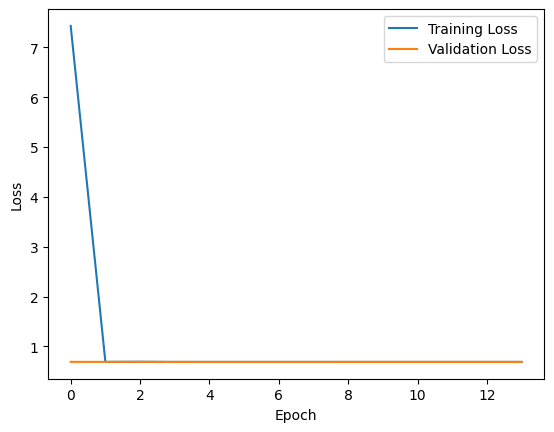

In [ ]:
# Plot training and validation loss
plt.plot(metrics_df12['loss'], label='Training Loss')
plt.plot(metrics_df12['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

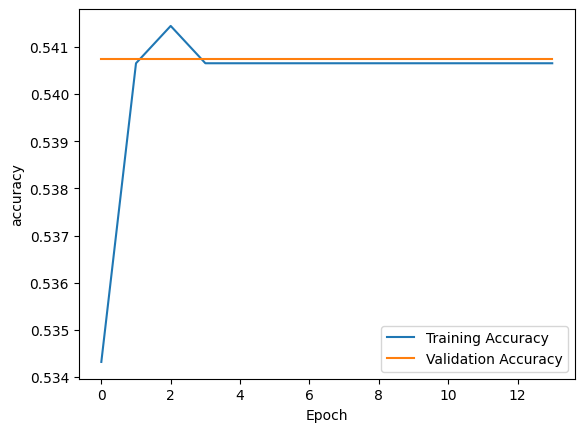

In [ ]:
# Plot training and validation loss
plt.plot(metrics_df12['accuracy'], label='Training Accuracy')
plt.plot(metrics_df12['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**DENSE NET**

In [ ]:
def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        x1 = tf.keras.layers.Conv2D(growth_rate, (3, 3), padding='same', activation='relu')(x)
        x = tf.keras.layers.Concatenate()([x, x1])
    return x

def transition_block(x):
    x = tf.keras.layers.Conv2D(int(x.shape[-1] * 0.5), (1, 1), padding='same', activation='relu')(x)
    x = tf.keras.layers.AveragePooling2D((2, 2), padding='same')(x)
    return x

def build_densenet(input_shape, num_blocks, num_layers_per_block, growth_rate):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = inputs

    x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    for block in range(num_blocks):
        x = dense_block(x, num_layers_per_block, growth_rate)
        if block != num_blocks - 1:
            x = transition_block(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    return tf.keras.Model(inputs, outputs)


input_shape = (224, 224, 3)
num_blocks = 3
num_layers_per_block = 4
growth_rate = 32


model3 = build_densenet(input_shape, num_blocks, num_layers_per_block, growth_rate)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 56, 56, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 56, 56, 32)           18464     ['max_pooling2d[0][0]']   

In [ ]:
history3 = model3.fit(train_generator, epochs=50, validation_data=val_generator,  callbacks=stop_early)

Epoch 1/50
119/119 [==============================] - 834s 7s/step - loss: 0.6695 - accuracy: 0.5892 - val_loss: 0.5716 - val_accuracy: 0.6952
Epoch 2/50
119/119 [==============================] - 801s 7s/step - loss: 0.5600 - accuracy: 0.7262 - val_loss: 0.4937 - val_accuracy: 0.7640
Epoch 3/50
119/119 [==============================] - 796s 7s/step - loss: 0.4675 - accuracy: 0.8036 - val_loss: 0.4702 - val_accuracy: 0.7989
Epoch 4/50
119/119 [==============================] - 805s 7s/step - loss: 0.3782 - accuracy: 0.8355 - val_loss: 0.3332 - val_accuracy: 0.8603
Epoch 5/50
119/119 [==============================] - 817s 7s/step - loss: 0.3588 - accuracy: 0.8453 - val_loss: 0.3482 - val_accuracy: 0.8519
Epoch 6/50
119/119 [==============================] - 780s 7s/step - loss: 0.3056 - accuracy: 0.8701 - val_loss: 0.3464 - val_accuracy: 0.8540
Epoch 7/50
119/119 [==============================] - 803s 7s/step - loss: 0.3180 - accuracy: 0.8659 - val_loss: 0.2831 - val_accuracy: 0.8836

In [ ]:
metrics_df3= pd.DataFrame(history3.history)

In [ ]:
metrics_df3

,loss,accuracy,val_loss,val_accuracy
0,0.669529,0.589229,0.571605,0.695238
1,0.559961,0.726241,0.493720,0.764021
2,0.467525,0.803590,0.470210,0.798942
3,0.378211,0.835533,0.333234,0.860317
4,0.358849,0.845301,0.348242,0.851852
5,0.305593,0.870116,0.346382,0.853968
6,0.317986,0.865892,0.283141,0.883598
7,0.284153,0.884108,0.309779,0.867725
8,0.271658,0.884636,0.250997,0.903704
9,0.267591,0.893611,0.276710,0.878307


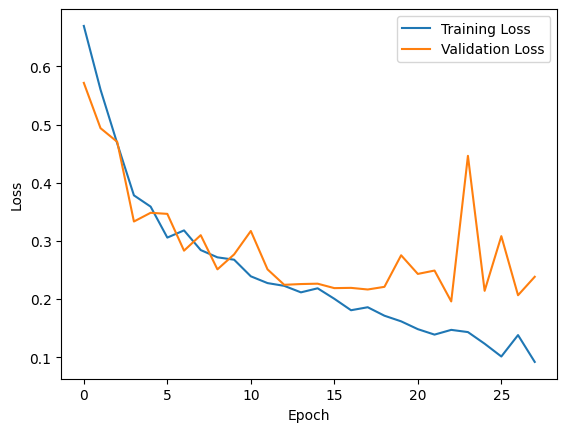

In [ ]:
#training and validation loss
plt.plot(metrics_df3['loss'], label='Training Loss')
plt.plot(metrics_df3['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

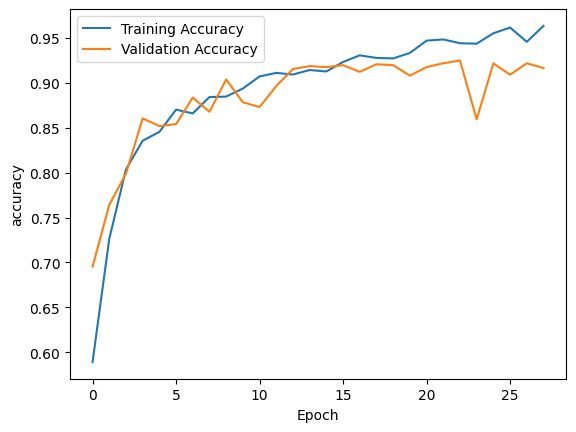

In [ ]:
#training and validation loss
plt.plot(metrics_df3['accuracy'], label='Training Accuracy')
plt.plot(metrics_df3['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**CNN**

In [ ]:
model2 = Sequential()


model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model2.add(Flatten())


model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=stop_early)

Epoch 1/50
119/119 [==============================] - 368s 3s/step - loss: 0.5490 - accuracy: 0.7727 - val_loss: 0.3461 - val_accuracy: 0.8624
Epoch 2/50
119/119 [==============================] - 366s 3s/step - loss: 0.3053 - accuracy: 0.8733 - val_loss: 0.3047 - val_accuracy: 0.8815
Epoch 3/50
119/119 [==============================] - 381s 3s/step - loss: 0.1778 - accuracy: 0.9348 - val_loss: 0.2978 - val_accuracy: 0.8899
Epoch 4/50
119/119 [==============================] - 356s 3s/step - loss: 0.0923 - accuracy: 0.9686 - val_loss: 0.3389 - val_accuracy: 0.8847
Epoch 5/50
119/119 [==============================] - 386s 3s/step - loss: 0.0371 - accuracy: 0.9897 - val_loss: 0.4242 - val_accuracy: 0.8730
Epoch 6/50
119/119 [==============================] - 380s 3s/step - loss: 0.0146 - accuracy: 0.9968 - val_loss: 0.4999 - val_accuracy: 0.8857
Epoch 7/50
119/119 [==============================] - 372s 3s/step - loss: 0.0099 - accuracy: 0.9987 - val_loss: 0.5401 - val_accuracy: 0.8804

In [ ]:
metrics_df2= pd.DataFrame(history2.history)

In [ ]:
metrics_df2

,loss,accuracy,val_loss,val_accuracy
0,0.548978,0.772703,0.346142,0.862434
1,0.305343,0.873284,0.304655,0.881481
2,0.177845,0.934794,0.297763,0.889947
3,0.092266,0.968585,0.338899,0.884656
4,0.037070,0.989704,0.424151,0.873016
5,0.014618,0.996832,0.499903,0.885714
6,0.009917,0.998680,0.540083,0.880423
7,0.003854,0.999736,0.579116,0.883598


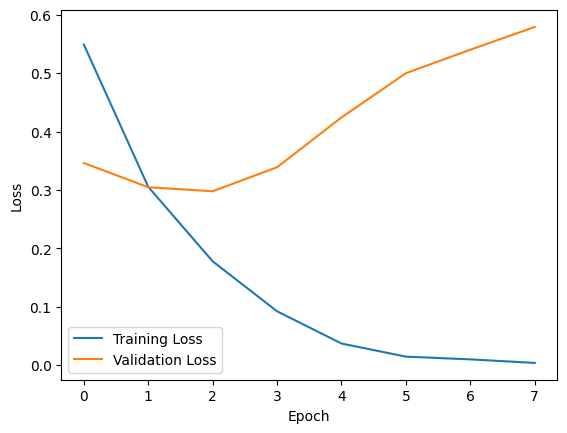

In [ ]:
# Plot training and validation loss
plt.plot(metrics_df2['loss'], label='Training Loss')
plt.plot(metrics_df2['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

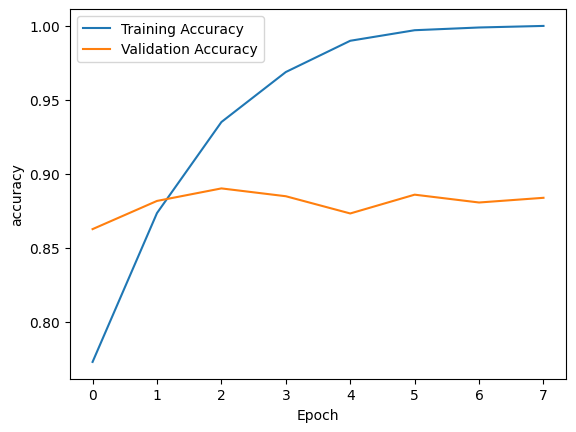

In [ ]:
# Plot training and validation loss
plt.plot(metrics_df2['accuracy'], label='Training Accuracy')
plt.plot(metrics_df2['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

CNN with dropout

In [ ]:
model22 = Sequential()

model22.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model22.add(MaxPooling2D(pool_size=(2, 2)))

model22.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model22.add(MaxPooling2D(pool_size=(2, 2)))

model22.add(Flatten())


model22.add(Dense(units=64, activation='relu'))
model22.add(Dropout(0.5))
model22.add(Dense(units=1, activation='sigmoid'))


model22.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model22.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
history22 = model22.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=stop_early)

Epoch 1/50
119/119 [==============================] - 424s 4s/step - loss: 0.8654 - accuracy: 0.6154 - val_loss: 0.5464 - val_accuracy: 0.7471
Epoch 2/50
119/119 [==============================] - 458s 4s/step - loss: 0.5139 - accuracy: 0.7701 - val_loss: 0.4567 - val_accuracy: 0.8011
Epoch 3/50
119/119 [==============================] - 415s 3s/step - loss: 0.4569 - accuracy: 0.8010 - val_loss: 0.5009 - val_accuracy: 0.7735
Epoch 4/50
119/119 [==============================] - 418s 3s/step - loss: 0.4397 - accuracy: 0.8094 - val_loss: 0.3942 - val_accuracy: 0.8254
Epoch 5/50
119/119 [==============================] - 416s 3s/step - loss: 0.4144 - accuracy: 0.8303 - val_loss: 0.3999 - val_accuracy: 0.8254
Epoch 6/50
119/119 [==============================] - 415s 3s/step - loss: 0.4006 - accuracy: 0.8371 - val_loss: 0.3607 - val_accuracy: 0.8487
Epoch 7/50
119/119 [==============================] - 413s 3s/step - loss: 0.3840 - accuracy: 0.8421 - val_loss: 0.3445 - val_accuracy: 0.8603

In [ ]:
metrics_df22= pd.DataFrame(history22.history)

In [ ]:
metrics_df22

,loss,accuracy,val_loss,val_accuracy
0,0.865386,0.615364,0.546381,0.747090
1,0.513937,0.770063,0.456691,0.801058
2,0.456921,0.800950,0.500864,0.773545
3,0.439674,0.809398,0.394173,0.825397
4,0.414410,0.830253,0.399860,0.825397
5,0.400613,0.837117,0.360736,0.848677
6,0.384014,0.842133,0.344491,0.860317
7,0.375697,0.844509,0.359704,0.846561
8,0.352180,0.858765,0.341076,0.862434
9,0.354078,0.858501,0.415032,0.846561


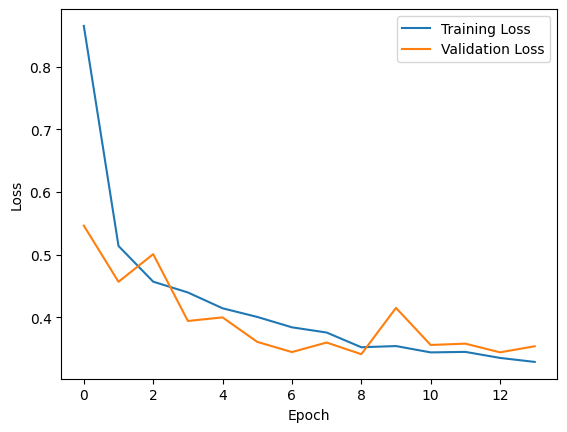

In [ ]:
# Plot training and validation loss
plt.plot(metrics_df22['loss'], label='Training Loss')
plt.plot(metrics_df22['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

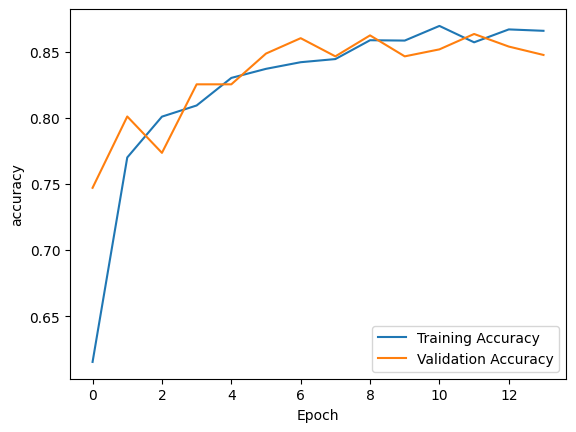

In [ ]:
# Plot training and validation loss
plt.plot(metrics_df22['accuracy'], label='Training Accuracy')
plt.plot(metrics_df22['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

cnn with more layers

In [ ]:
model23 = Sequential()


model23.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model23.add(MaxPooling2D(pool_size=(2, 2)))

model23.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model23.add(MaxPooling2D(pool_size=(2, 2)))

model23.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model23.add(MaxPooling2D(pool_size=(2, 2)))


model23.add(Flatten())


model23.add(Dense(units=128, activation='relu'))
model23.add(Dropout(0.3))

model23.add(Dense(units=64, activation='relu'))
model23.add(Dropout(0.3))

model23.add(Dense(units=1, activation='sigmoid'))


model23.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model23.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 28, 28, 128)      

In [ ]:
history23 = model23.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=35,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

Epoch 1/35
119/119 [==============================] - 620s 5s/step - loss: 0.6378 - accuracy: 0.6645 - val_loss: 0.4629 - val_accuracy: 0.7725
Epoch 2/35
119/119 [==============================] - 622s 5s/step - loss: 0.4998 - accuracy: 0.7793 - val_loss: 0.4745 - val_accuracy: 0.7958
Epoch 3/35
119/119 [==============================] - 620s 5s/step - loss: 0.4456 - accuracy: 0.8147 - val_loss: 0.4783 - val_accuracy: 0.7757
Epoch 4/35
119/119 [==============================] - 622s 5s/step - loss: 0.4018 - accuracy: 0.8350 - val_loss: 0.3854 - val_accuracy: 0.8370
Epoch 5/35
119/119 [==============================] - 587s 5s/step - loss: 0.3968 - accuracy: 0.8342 - val_loss: 0.4033 - val_accuracy: 0.8286
Epoch 6/35
119/119 [==============================] - 588s 5s/step - loss: 0.3719 - accuracy: 0.8530 - val_loss: 0.3497 - val_accuracy: 0.8614
Epoch 7/35
119/119 [==============================] - 622s 5s/step - loss: 0.3563 - accuracy: 0.8548 - val_loss: 0.3244 - val_accuracy: 0.8825

In [ ]:
metrics_df23= pd.DataFrame(history23.history)

In [ ]:
metrics_df23

,loss,accuracy,val_loss,val_accuracy
0,0.637777,0.664467,0.462871,0.772487
1,0.499829,0.779303,0.474549,0.795767
2,0.445616,0.814678,0.478320,0.775661
3,0.401822,0.835005,0.385422,0.837037
4,0.396761,0.834213,0.403258,0.828571
5,0.371940,0.852957,0.349670,0.861376
6,0.356340,0.854805,0.324382,0.882540
7,0.328674,0.873812,0.365990,0.846561
8,0.333723,0.866684,0.312359,0.876190
9,0.320042,0.877244,0.296635,0.881481


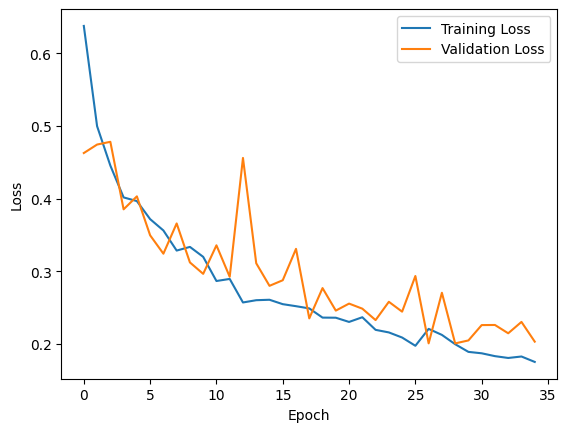

In [ ]:
#Plot training and validation loss
plt.plot(metrics_df23['loss'], label='Training Loss')
plt.plot(metrics_df23['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

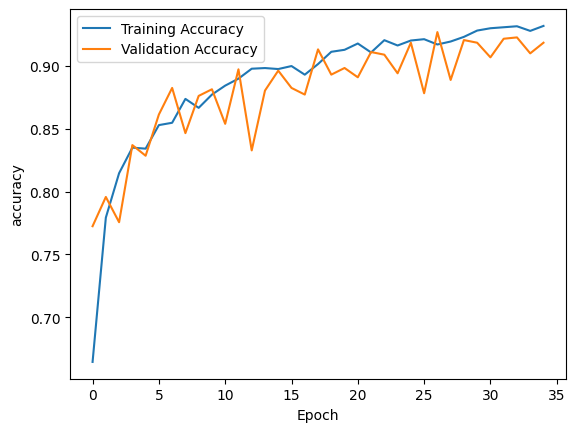

In [ ]:
# Plot training and validation loss
plt.plot(metrics_df23['accuracy'], label='Training Accuracy')
plt.plot(metrics_df23['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

prediction

In [ ]:
pred = model23.predict(test_generator)

37/37 [==============================] - 64s 2s/step


In [ ]:
pred

array([[0.21069506],
       [0.00116787],
       [0.09010807],
       ...,
       [0.9983102 ],
       [0.98892486],
       [0.9450379 ]], dtype=float32)

In [ ]:
threshold = 0.5

binary_predictions = (pred > threshold).astype(int)

print(binary_predictions)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
true_classes = test_generator.classes
labels = list(test_generator.class_indices.keys())

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
# Calculate accuracy
accuracy = metrics.classification_report(true_classes,binary_predictions, target_names=labels)
print("Accuracy:", accuracy)


Accuracy:               precision    recall  f1-score   support

   chihuahua       0.93      0.93      0.93       640
      muffin       0.91      0.92      0.91       544

    accuracy                           0.92      1184
   macro avg       0.92      0.92      0.92      1184
weighted avg       0.92      0.92      0.92      1184



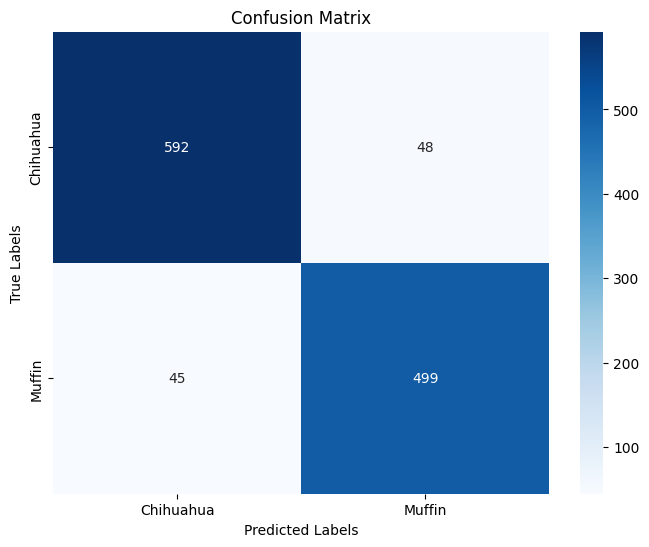

In [ ]:
conf_matrix = confusion_matrix(true_classes, binary_predictions)


labels = ['Chihuahua', 'Muffin']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model23.evaluate(test_generator)

37/37 [==============================] - 97s 3s/step - loss: 0.1920 - accuracy: 0.9231


[0.19201312959194183, 0.9231418967247009]

HYPERPARAMETER TUNING

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                     kernel_size=(3, 3),
                     activation='relu',
                     padding='same',
                     input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
                     kernel_size=(3, 3),
                     activation='relu',
                     padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=hp.Int('conv3_filters', min_value=32, max_value=128, step=32),
                     kernel_size=(3, 3),
                     activation='relu',
                     padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(units=hp.Int('dense1_units', min_value=64, max_value=256, step=64),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout1_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(units=hp.Int('dense2_units', min_value=32, max_value=128, step=32),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout2_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [ ]:
tuner = kt.BayesianOptimization(build_model,
                                objective='val_accuracy',
                                max_trials=5,
                                directory='./gdrive/MyDrive/MuffinChihuahua',
                                project_name='cnn',
                                overwrite=False)


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
conv1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
conv2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
conv3_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
dense1_units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
dropout1_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense2_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
dropout2_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0

In [ ]:
tuner.search(train_generator, validation_data=val_generator, callbacks=stop_early)

Trial 5 Complete [00h 02m 25s]
val_accuracy: 0.7333333492279053

Best val_accuracy So Far: 0.7682539820671082
Total elapsed time: 00h 10m 14s


In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hyperparameters.values)

Best Hyperparameters: {'conv1_filters': 96, 'conv2_filters': 64, 'conv3_filters': 96, 'dense1_units': 256, 'dropout1_rate': 0.4, 'dense2_units': 64, 'dropout2_rate': 0.30000000000000004, 'learning_rate': 0.0001}


In [ ]:
model2h = Sequential()

model2h.add(Conv2D(filters=96, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model2h.add(MaxPooling2D(pool_size=(2, 2)))

model2h.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model2h.add(MaxPooling2D(pool_size=(2, 2)))

model2h.add(Conv2D(filters=96, kernel_size=(3, 3), activation='relu', padding='same'))
model2h.add(MaxPooling2D(pool_size=(2, 2)))

model2h.add(Flatten())

model2h.add(Dense(units=256, activation='relu'))
model2h.add(Dropout(0.4))

model2h.add(Dense(units=64, activation='relu'))
model2h.add(Dropout(0.3))

model2h.add(Dense(units=1, activation='sigmoid'))  # Binary classification output


model2h.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model2h.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 224, 224, 96)      2688      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 112, 112, 96)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 64)      55360     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 28, 28, 96)       

In [ ]:
history2h = model2h.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
)

Epoch 1/25
119/119 [==============================] - 962s 8s/step - loss: 0.6410 - accuracy: 0.6257 - val_loss: 0.5541 - val_accuracy: 0.7164
Epoch 2/25
119/119 [==============================] - 967s 8s/step - loss: 0.4933 - accuracy: 0.7825 - val_loss: 0.4507 - val_accuracy: 0.8042
Epoch 3/25
119/119 [==============================] - 961s 8s/step - loss: 0.4448 - accuracy: 0.8118 - val_loss: 0.3934 - val_accuracy: 0.8286
Epoch 4/25
119/119 [==============================] - 959s 8s/step - loss: 0.4248 - accuracy: 0.8276 - val_loss: 0.3734 - val_accuracy: 0.8402
Epoch 5/25
119/119 [==============================] - 965s 8s/step - loss: 0.4032 - accuracy: 0.8329 - val_loss: 0.3921 - val_accuracy: 0.8392
Epoch 6/25
119/119 [==============================] - 957s 8s/step - loss: 0.3640 - accuracy: 0.8503 - val_loss: 0.4304 - val_accuracy: 0.8074
Epoch 7/25
119/119 [==============================] - 962s 8s/step - loss: 0.3589 - accuracy: 0.8588 - val_loss: 0.3438 - val_accuracy: 0.8603

In [ ]:
metrics_df2h= pd.DataFrame(history2h.history)

In [ ]:
metrics_df2h

,loss,accuracy,val_loss,val_accuracy
0,0.641010,0.625660,0.554145,0.716402
1,0.493273,0.782471,0.450702,0.804233
2,0.444780,0.811774,0.393443,0.828571
3,0.424819,0.827614,0.373420,0.840212
4,0.403195,0.832893,0.392138,0.839153
5,0.364049,0.850317,0.430379,0.807407
6,0.358943,0.858765,0.343812,0.860317
7,0.349226,0.858501,0.416222,0.846561
8,0.333585,0.868268,0.325985,0.871958
9,0.317496,0.876452,0.323331,0.876190


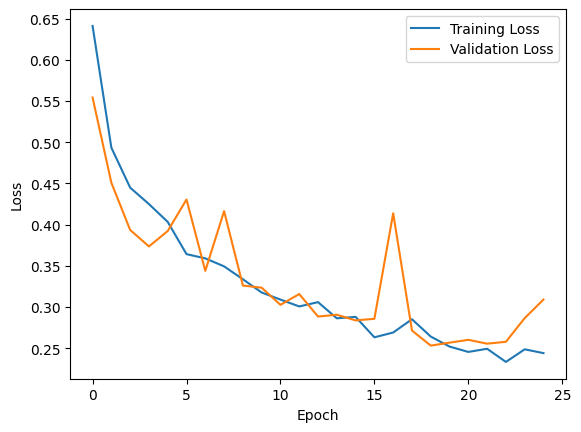

In [ ]:
#Plot training and validation loss
plt.plot(metrics_df2h['loss'], label='Training Loss')
plt.plot(metrics_df2h['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

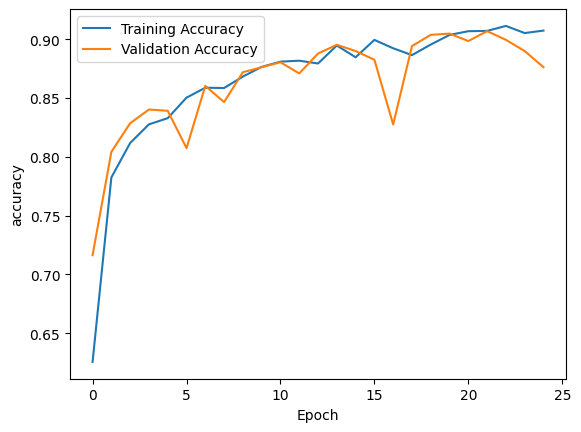

In [ ]:
# Plot training and validation loss
plt.plot(metrics_df2h['accuracy'], label='Training Accuracy')
plt.plot(metrics_df2h['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

prediction 1

In [ ]:
pred1 = model2h.predict(test_generator)

37/37 [==============================] - 114s 3s/step


In [ ]:
pred1

array([[0.07056763],
       [0.00854402],
       [0.03058187],
       ...,
       [0.8962567 ],
       [0.62594223],
       [0.97955215]], dtype=float32)

In [ ]:

threshold = 0.5

binary_predictions1 = (pred1 > threshold).astype(int)


In [ ]:
true_classes1 = test_generator.classes
labels1 = list(test_generator.class_indices.keys())

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

accuracy1 = metrics.classification_report(true_classes1,binary_predictions1, target_names=labels1)
print("Accuracy:", accuracy1)


Accuracy:               precision    recall  f1-score   support

   chihuahua       0.85      0.98      0.91       640
      muffin       0.97      0.80      0.88       544

    accuracy                           0.90      1184
   macro avg       0.91      0.89      0.90      1184
weighted avg       0.91      0.90      0.90      1184



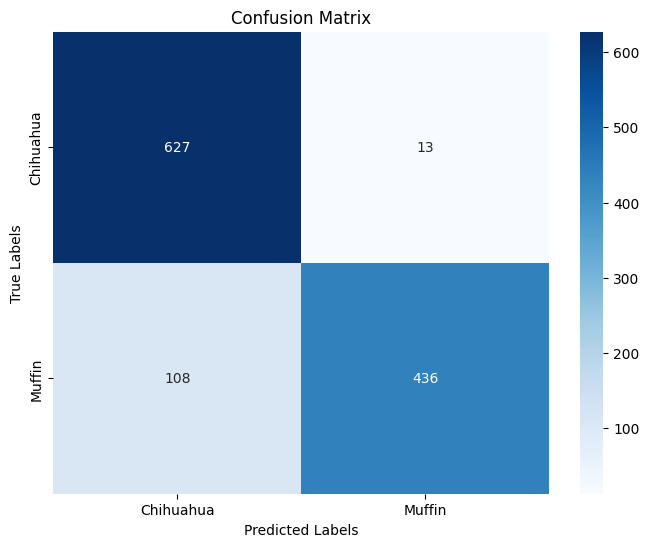

In [ ]:
conf_matrix1 = confusion_matrix(true_classes1, binary_predictions1)


labels = ['Chihuahua', 'Muffin']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model2h.evaluate(test_generator)

37/37 [==============================] - 108s 3s/step - loss: 0.2621 - accuracy: 0.8902


[0.2621050477027893, 0.8902027010917664]

5 Fold Cross Validation

In [ ]:
num_folds = 5


zero_one_loss_scores = []

skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

filenames_array = np.array(train_generator.filenames)

num_samples = len(filenames_array)

# k-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(train_generator.filenames, train_generator.classes)):
    print(f"Fold {fold + 1}")


    train_filenames = filenames_array[train_index]
    val_filenames = filenames_array[val_index]


    train_labels = np.array(train_generator.classes)[train_index]
    val_labels = np.array(train_generator.classes)[val_index]


    target_size = (224, 224)
    batch_size = 32

    datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True,
        channel_shift_range=0.2
    )


    train_generator = datagen.flow_from_directory(
        '/content/train',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        color_mode='rgb',
        shuffle=True,
        classes=['chihuahua', 'muffin']
    )

    val_generator = datagen.flow_from_directory(
        '/content/validation',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        color_mode='rgb',
        shuffle=True,
        classes=['chihuahua', 'muffin']
    )

    test_generator = datagen.flow_from_directory(
        '/content/test',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        color_mode='rgb',
        shuffle=True,
        classes=['chihuahua', 'muffin']
    )




    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    model = tuner.hypermodel.build(best_hyperparameters)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


    stop_early = EarlyStopping(monitor='val_loss', patience=3)


    history = model.fit(
        train_generator,
        epochs=25,
        callbacks=[stop_early],
        validation_data=val_generator
    )

    # SAVE BEST MODEL
    model_path = "/content/model_" + str(fold) + ".h5"
    model.save(model_path)

    # LOAD BEST MODEL to evaluate the performance of the model
    if os.path.exists(model_path):
        model.load_weights(model_path)
    else:
        print("File doesn't exist")

    # Evaluate the model
    results = model.evaluate(test_generator)
    results = dict(zip(model.metrics_names, results))

    # Compute zero-one loss (1 - accuracy)
    zero_one_loss = 1 - results['accuracy']
    zero_one_loss_scores.append(zero_one_loss)

    tf.keras.backend.clear_session()


for fold, loss in enumerate(zero_one_loss_scores):
    print(f"Fold {fold + 1} Zero-One Loss: {loss}")


average_loss = np.mean(zero_one_loss_scores)
print(f"Average Zero-One Loss: {average_loss}")


Fold 1
Found 3788 images belonging to 2 classes.
Found 945 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.
Epoch 1/25
119/119 [==============================] - 102s 817ms/step - loss: 0.6873 - accuracy: 0.6209 - val_loss: 0.4804 - val_accuracy: 0.7619
Epoch 2/25
119/119 [==============================] - 87s 736ms/step - loss: 0.5253 - accuracy: 0.7518 - val_loss: 0.4213 - val_accuracy: 0.8032
Epoch 3/25
119/119 [==============================] - 91s 769ms/step - loss: 0.4638 - accuracy: 0.7978 - val_loss: 0.3655 - val_accuracy: 0.8370
Epoch 4/25
119/119 [==============================] - 96s 802ms/step - loss: 0.4232 - accuracy: 0.8205 - val_loss: 0.3936 - val_accuracy: 0.8360
Epoch 5/25
119/119 [==============================] - 79s 661ms/step - loss: 0.4011 - accuracy: 0.8326 - val_loss: 0.3469 - val_accuracy: 0.8540
Epoch 6/25
119/119 [==============================] - 79s 664ms/step - loss: 0.3871 - accuracy: 0.8493 - val_loss: 0.3557 - val_accuracy: 0.85

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 21s 559ms/step - loss: 0.2744 - accuracy: 0.8851
Fold 2
Found 3788 images belonging to 2 classes.
Found 945 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.
Epoch 1/25
119/119 [==============================] - 82s 662ms/step - loss: 0.5991 - accuracy: 0.7035 - val_loss: 0.5008 - val_accuracy: 0.7608
Epoch 2/25
119/119 [==============================] - 81s 681ms/step - loss: 0.4635 - accuracy: 0.7991 - val_loss: 0.4336 - val_accuracy: 0.8201
Epoch 3/25
119/119 [==============================] - 78s 657ms/step - loss: 0.4197 - accuracy: 0.8229 - val_loss: 0.3535 - val_accuracy: 0.8582
Epoch 4/25
119/119 [==============================] - 79s 665ms/step - loss: 0.3911 - accuracy: 0.8358 - val_loss: 0.3347 - val_accuracy: 0.8603
Epoch 5/25
119/119 [==============================] - 76s 639ms/step - loss: 0.3634 - accuracy: 0.8564 - val_loss: 0.3350 - val_accuracy: 0.8677
Epoch 6/25
119/119 [==============================] -

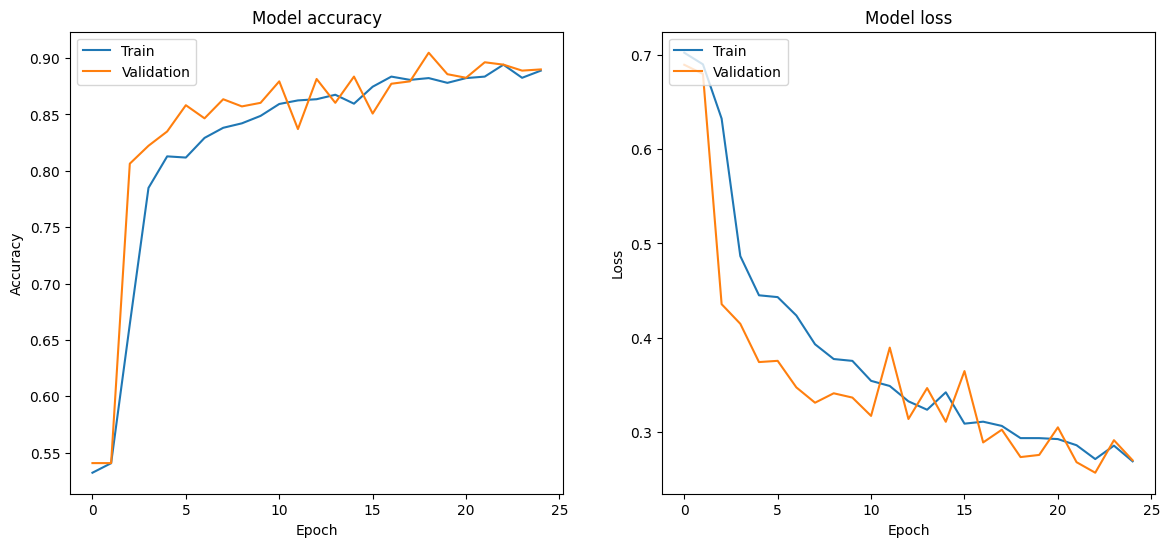

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
print(f"Final Model Test Set Evaluation: {results}")


Final Model Test Set Evaluation: {'loss': 0.27272215485572815, 'accuracy': 0.8758445978164673}
